 TASK 4

# Problem Statement: 
To analyse the battery charge-discharge testdataset and predict the maximum discharge capacity through a machine learning or deeplearning approach. 

# Approach:
Step 1: Import of the raw dataset

Step 2: Data Preprocessing . Data visualization and Looking out for outliers, data augmentation and cleaning. 

Step 3: Look out for the correlation among the input variables on the target variable.

Step 4: Dataset preparation for training and testing.

Step 5: Model building with NN or DNN 

Step 6: Performance evaluation

In [1]:
# import libraries for basic math operations, data import, cleaning and visualization

import numpy as np    
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Import and Preprocessing

In [2]:
# importing the raw dataset
raw_batt_data = pd.read_csv('Battery Challenge.csv')

In [3]:
raw_batt_data.head()

Data_Point  Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index  \
0           0    60.0002  1.523583e+09    60.0002           0            0   
1           1   120.0110  1.523583e+09   120.0110           0            0   
2           2   180.0036  1.523583e+09   180.0036           0            0   
3           3   240.0044  1.523583e+09   240.0044           0            0   
4           4   300.0033  1.523583e+09   300.0033           0            0   

   Current   Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
0      0.0  3.298958              0.0                 0.0            0.0   
1      0.0  3.298994              0.0                 0.0            0.0   
2      0.0  3.299010              0.0                 0.0            0.0   
3      0.0  3.299028              0.0                 0.0            0.0   
4      0.0  3.299037              0.0                 0.0            0.0   

   Discharge_Energy     dV/dt  Internal_Resistance  Temperature  Aux_Voltage  
0               0.0  0.000031                  NaN          NaN          NaN  
1               0.0 -0.000011                  NaN    21.950123          NaN  
2               0.0  0.000024                  NaN    21.996164          NaN  
3               0.0 -0.000014                  NaN    22.138861          NaN  
4               0.0 -0.000011                  NaN    22.339970          NaN

In [4]:
# Check for different datatypes in the imported dataset
raw_batt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1562084 non-null  float64
 14  Temperature          1564262 non-null  float64
 15

The datatypes of all features in the dataset are either Float or integer. From the above, it can be seen that there are no recordings pertaining to Aux_voltage as well as some missing values in Internal_resistance. In the next step, these nan values are cleaned from the raw dataset by appropriate mean values.

The Data_Point column is dummy one and it shall be deleted from the main dataset. 


Text(0, 0.5, 'Time Steps')

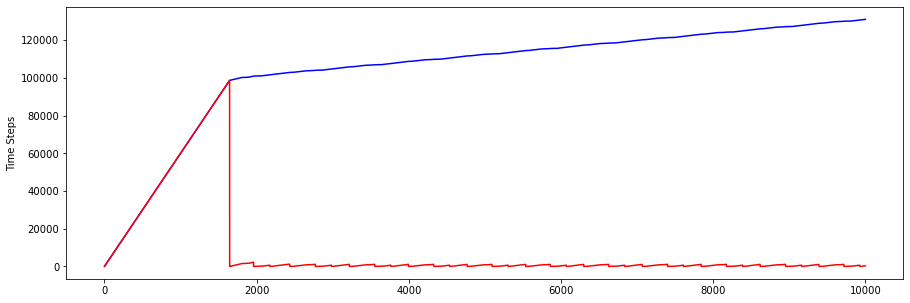

In [5]:
# Understand how the data is distrubuted across time. To check about the uniformity among cycles across, ....
# .... initial discharge/charge patterns etc.

plt.rcParams['figure.figsize'] = (15,5)
plt.plot(raw_batt_data['Test_Time'][:10000],'-b')
plt.plot(raw_batt_data['Step_Time'][:10000],'-r')
plt.ylabel('Time Steps')


Text(0, 0.5, 'step_index')

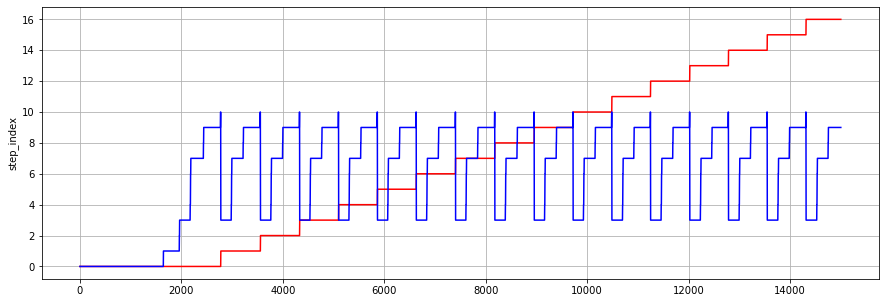

In [6]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(raw_batt_data['Cycle_Index'][0:15000],'-r')
plt.plot(raw_batt_data['Step_Index'][0:15000],'-b')
plt.grid(axis = 'both')
plt.ylabel('step_index')


Text(0, 0.5, 'Voltage')

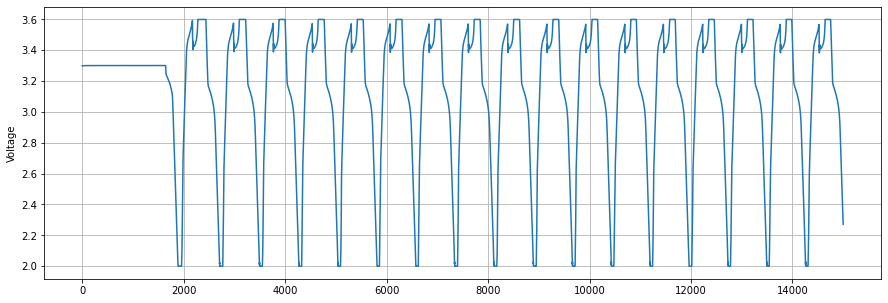

In [7]:
plt.plot(raw_batt_data['Voltage'][:15000])
plt.grid(axis = 'both')
plt.ylabel('Voltage')

The above plot describes about the time steps for each event in the test process. It can be seen that initially there is a initial discharge/charge step before starting the cycling process. From the above figures, it can be observed that initial few steps (upto approx 2000 datapoints) are non repititive. From the voltage curve, it describes the initial discharge phenomenon to have a reference at the EoDV(assuming as 2.0V) point. During this phase, the internal resistance readings are not recorded and can be ignored in our cleaned dataset. 


In [8]:
raw_batt_data = raw_batt_data.drop(['Aux_Voltage'],axis = 1) # remove Aux Voltage

In [9]:
raw_batt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1562084 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

There are still certain missing values in the internal resistance measurements. Inorder to clean it or process this data, we shall visualize how the recordings were distributed. 


<AxesSubplot:xlabel='Internal_Resistance', ylabel='Count'>

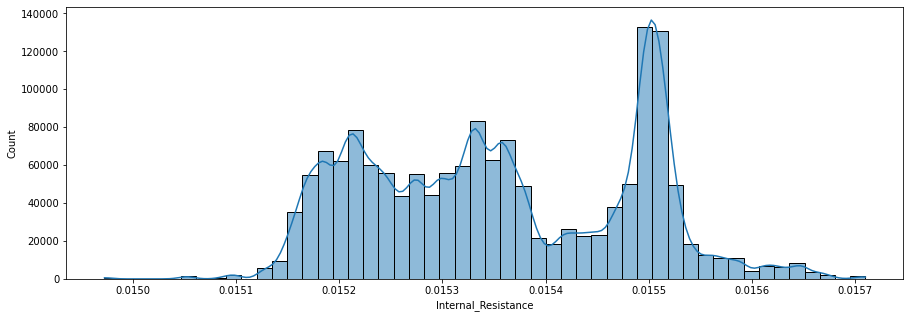

In [10]:
sns.histplot(raw_batt_data['Internal_Resistance'],bins = 50,kde = True)

In [11]:
raw_batt_data['Internal_Resistance'].describe()

count    1.562084e+06
mean     1.535631e-02
std      1.291732e-04
min      1.497273e-02
25%      1.524088e-02
50%      1.534182e-02
75%      1.549029e-02
max      1.570977e-02
Name: Internal_Resistance, dtype: float64

Replace the NaN Values with the mean value of Internal resitance i.e. 0.01535 Ohms

In [12]:
# fill na values with mean values
raw_batt_data['Internal_Resistance'].fillna(1.535631e-02,inplace=True)

In [13]:
raw_batt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564263 entries, 0 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564263 non-null  int64  
 1   Test_Time            1564263 non-null  float64
 2   DateTime             1564263 non-null  float64
 3   Step_Time            1564263 non-null  float64
 4   Step_Index           1564263 non-null  int64  
 5   Cycle_Index          1564263 non-null  int64  
 6   Current              1564263 non-null  float64
 7   Voltage              1564263 non-null  float64
 8   Charge_Capacity      1564263 non-null  float64
 9   Discharge_Capacity   1564263 non-null  float64
 10  Charge_Energy        1564263 non-null  float64
 11  Discharge_Energy     1564263 non-null  float64
 12  dV/dt                1564263 non-null  float64
 13  Internal_Resistance  1564263 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

In [14]:
#remove missing values
batt_data = raw_batt_data.dropna(axis = 0,inplace = False)

In [15]:
batt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564262 entries, 1 to 1564262
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Data_Point           1564262 non-null  int64  
 1   Test_Time            1564262 non-null  float64
 2   DateTime             1564262 non-null  float64
 3   Step_Time            1564262 non-null  float64
 4   Step_Index           1564262 non-null  int64  
 5   Cycle_Index          1564262 non-null  int64  
 6   Current              1564262 non-null  float64
 7   Voltage              1564262 non-null  float64
 8   Charge_Capacity      1564262 non-null  float64
 9   Discharge_Capacity   1564262 non-null  float64
 10  Charge_Energy        1564262 non-null  float64
 11  Discharge_Energy     1564262 non-null  float64
 12  dV/dt                1564262 non-null  float64
 13  Internal_Resistance  1564262 non-null  float64
 14  Temperature          1564262 non-null  float64
dty

In [16]:
# remove columns Data_point,Aux_voltage
batt_data = batt_data.drop(['Data_Point'],axis = 1)


In [17]:
batt_data.reset_index(drop = True,inplace =True)

In [18]:
batt_data.head()

Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index  Current  \
0   120.0110  1.523583e+09   120.0110           0            0      0.0   
1   180.0036  1.523583e+09   180.0036           0            0      0.0   
2   240.0044  1.523583e+09   240.0044           0            0      0.0   
3   300.0033  1.523583e+09   300.0033           0            0      0.0   
4   360.0031  1.523583e+09   360.0031           0            0      0.0   

    Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
0  3.298994              0.0                 0.0            0.0   
1  3.299010              0.0                 0.0            0.0   
2  3.299028              0.0                 0.0            0.0   
3  3.299037              0.0                 0.0            0.0   
4  3.299054              0.0                 0.0            0.0   

   Discharge_Energy     dV/dt  Internal_Resistance  Temperature  
0               0.0 -0.000011             0.015356    21.950123  
1               0.0  0.000024             0.015356    21.996164  
2               0.0 -0.000014             0.015356    22.138861  
3               0.0 -0.000011             0.015356    22.339970  
4               0.0  0.000038             0.015356    22.506639

# 2. Data Cleaning and Analysis of Predictors: 
In this step, the datapoints which are irrelevant for our modelling, are ignored or removed from the dataset.

In [19]:
#remove the first initial discharge phenomenon to have a uniform dataset. 
steps = []
for i in range(len(batt_data)-1):
    if batt_data['Step_Time'][i] > batt_data['Step_Time'][i+1]:
        steps.append(i+1)


As observed, step_index 3 at timepoint 1963 is our initial reference point and cycling is performed in between step_index 3 and step_index 10. So we clean the datapoints during these step indices.

In [20]:
batt_data_act = batt_data[1963:]

Text(0, 0.5, 'Voltage')

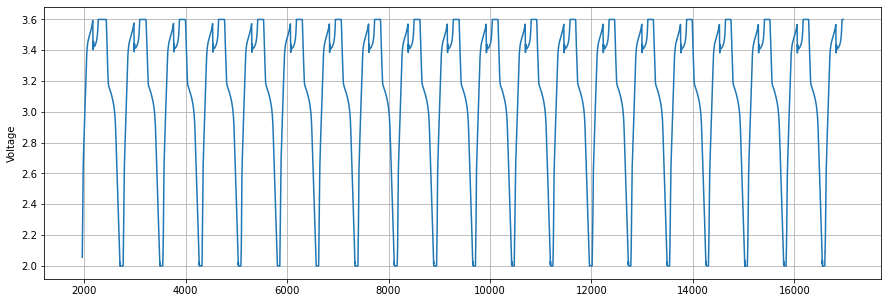

In [21]:
plt.plot(batt_data_act['Voltage'][:15000])
plt.grid(axis = 'both')
plt.ylabel('Voltage')

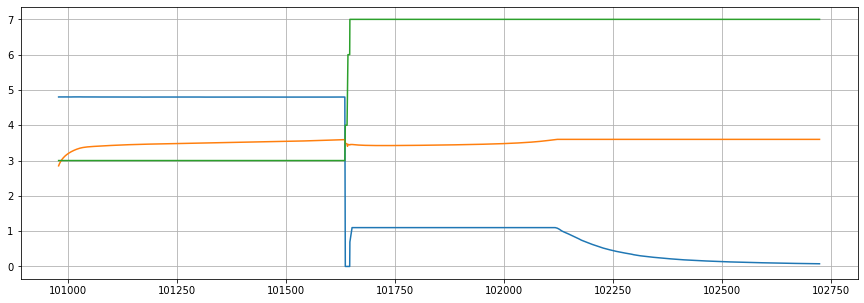

In [22]:
#take out all pauses from the analysis sequence
plt.plot(batt_data['Test_Time'][2000:2400],batt_data['Current'][2000:2400])
plt.plot(batt_data['Test_Time'][2000:2400],batt_data['Voltage'][2000:2400])
plt.plot(batt_data['Test_Time'][2000:2400],batt_data['Step_Index'][2000:2400])
plt.grid(axis = 'both')

In [23]:
# there are short pauses in the current measurements which look more apparantly due to the recording errors. 
#So these can be eliminated by eliminating the step_indices of 4,5 and 6

batt_data_01 = batt_data[(batt_data['Step_Index']!= 4) & (batt_data['Step_Index']!= 6) & (batt_data['Step_Index']!= 5)]

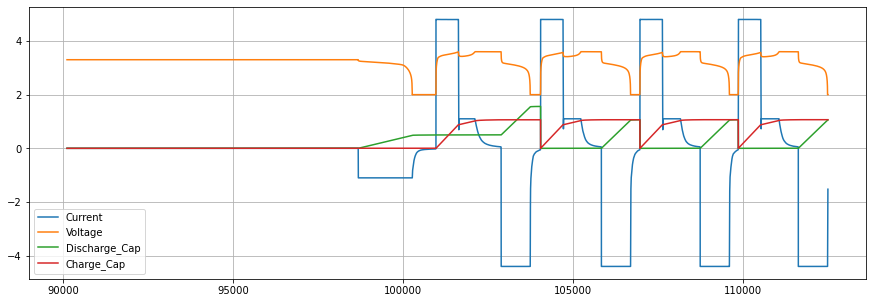

In [24]:
plt.plot(batt_data_01['Test_Time'][1500:5000],batt_data_01['Current'][1500:5000])
plt.plot(batt_data_01['Test_Time'][1500:5000],batt_data_01['Voltage'][1500:5000])
plt.plot(batt_data_01['Test_Time'][1500:5000],batt_data_01['Discharge_Capacity'][1500:5000])
plt.plot(batt_data_01['Test_Time'][1500:5000],batt_data_01['Charge_Capacity'][1500:5000])
plt.legend(['Current','Voltage','Discharge_Cap','Charge_Cap'])
plt.grid(axis = 'both')

From the above plot, it can be seen that there is a measurement error in the first cycle where the discharge capacity hasn't been reset to 0 after the discharge phase is completed. So, the first cycle is removed from the dataset to avoid outliers.

In [25]:
batt_data_02 = batt_data_01[batt_data_01['Cycle_Index']!= 0]

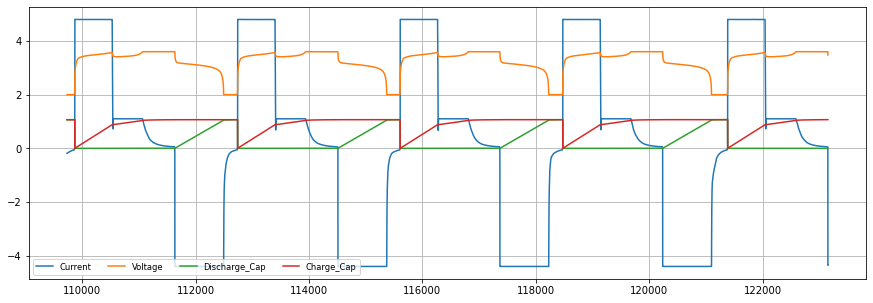

In [26]:
plt.plot(batt_data_02['Test_Time'][1500:5000],batt_data_02['Current'][1500:5000])
plt.plot(batt_data_02['Test_Time'][1500:5000],batt_data_02['Voltage'][1500:5000])
plt.plot(batt_data_02['Test_Time'][1500:5000],batt_data_02['Discharge_Capacity'][1500:5000])
plt.plot(batt_data_02['Test_Time'][1500:5000],batt_data_02['Charge_Capacity'][1500:5000])
plt.legend(['Current','Voltage','Discharge_Cap','Charge_Cap'],loc = 'lower left',fontsize = 'small',ncol = 4)
plt.grid(axis = 'both')

In [27]:
batt_data_02.head()

Test_Time      DateTime  Step_Time  Step_Index  Cycle_Index   Current  \
2775  104051.6204  1.523687e+09     0.0822           3            1  0.511612   
2776  104051.6510  1.523687e+09     0.1128           3            1  0.811741   
2777  104051.6872  1.523687e+09     0.1490           3            1  1.099796   
2778  104051.7160  1.523687e+09     0.1778           3            1  1.340481   
2779  104051.7447  1.523687e+09     0.2065           3            1  1.628368   

       Voltage  Charge_Capacity  Discharge_Capacity  Charge_Energy  \
2775  2.098604         0.000000                 0.0        0.00000   
2776  2.122912         0.000000                 0.0        0.00000   
2777  2.153046         0.000024                 0.0        0.00005   
2778  2.181218         0.000024                 0.0        0.00005   
2779  2.218609         0.000024                 0.0        0.00005   

      Discharge_Energy     dV/dt  Internal_Resistance  Temperature  
2775               0.0  0.023378             0.015408    34.833887  
2776               0.0  0.023378             0.015408    34.833965  
2777               0.0  0.023378             0.015408    34.834058  
2778               0.0  0.023378             0.015408    34.834131  
2779               0.0  0.023378             0.015408    34.834204

In the next step, the datetime, Charge Energy, Discharge energy which are assumed irrelavant for this challenge are removed from the dataset.

In [28]:
batt_data_act = batt_data_02.drop(['DateTime','Charge_Energy','Discharge_Energy'], inplace = False,axis = 1)
batt_data_act.reset_index(drop=True,inplace = True)

In [29]:
batt_data_act.head()

Test_Time  Step_Time  Step_Index  Cycle_Index   Current   Voltage  \
0  104051.6204     0.0822           3            1  0.511612  2.098604   
1  104051.6510     0.1128           3            1  0.811741  2.122912   
2  104051.6872     0.1490           3            1  1.099796  2.153046   
3  104051.7160     0.1778           3            1  1.340481  2.181218   
4  104051.7447     0.2065           3            1  1.628368  2.218609   

   Charge_Capacity  Discharge_Capacity     dV/dt  Internal_Resistance  \
0         0.000000                 0.0  0.023378             0.015408   
1         0.000000                 0.0  0.023378             0.015408   
2         0.000024                 0.0  0.023378             0.015408   
3         0.000024                 0.0  0.023378             0.015408   
4         0.000024                 0.0  0.023378             0.015408   

   Temperature  
0    34.833887  
1    34.833965  
2    34.834058  
3    34.834131  
4    34.834204

The aim of this model is to predict the discharge capacity. So as a first try, the data relevant to charge phase is ignored and only the discharge phase is considered henceforth.

Therefore, the relevant step_indices 7,8,10 and 3 are ignored. 

In [30]:
batt_data_act= batt_data_act[(batt_data_act['Step_Index']!= 3) & (batt_data_act['Step_Index']!= 7) & (batt_data_act['Step_Index']!= 10) & (batt_data_act['Step_Index']!= 8)]

In [31]:
batt_data_act.reset_index(drop = True,inplace = True)

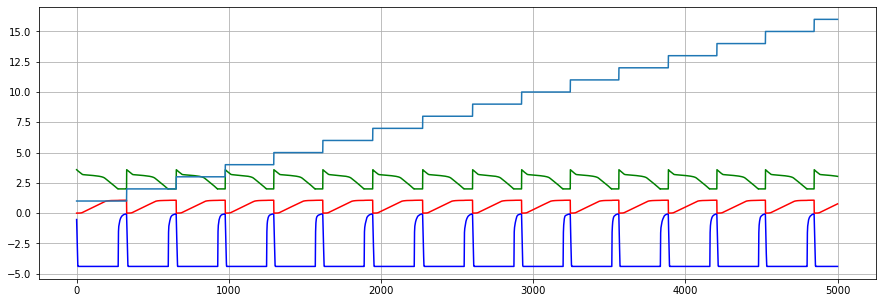

In [32]:
plt.plot(batt_data_act['Current'][:5000],'-b')
plt.plot(batt_data_act['Voltage'][:5000],'-g')
plt.plot(batt_data_act['Discharge_Capacity'][:5000],'-r')
plt.plot(batt_data_act['Cycle_Index'][:5000])

plt.grid(axis = 'both')

In [33]:
batt_data_03 = batt_data_act[['Cycle_Index','Voltage','Current','Discharge_Capacity','dV/dt','Internal_Resistance','Temperature']]

By observing the plots, and current characteristics, it is a CC discharge and CC-CV charge cycling over the entire test duration. However, we are interested only in discharge phase and the current datapoints are closely monitored. It can be seen that during the instant of switching between charge and discharge, a low value currents were recorded which are irrelevant and have negligible influence on the capacity degradation and capacity discharged.  

In [34]:
# there are certain points which recorded l
batt_data_04 = batt_data_03[batt_data_03['Current'] <= -4]

In [35]:
#extract the maximum withdrawn discharge capacity 

In [36]:
discharged_cap = {}
int_resistance = {}

for i in (batt_data_04['Cycle_Index'].unique()):
    
    discharged_cap[str(i)] = np.round(batt_data_04['Discharge_Capacity'][batt_data_04['Cycle_Index'] == i].max(),3)
    int_resistance[str(i)] = np.round(batt_data_04['Internal_Resistance'][batt_data_04['Cycle_Index'] == i].max(),3)

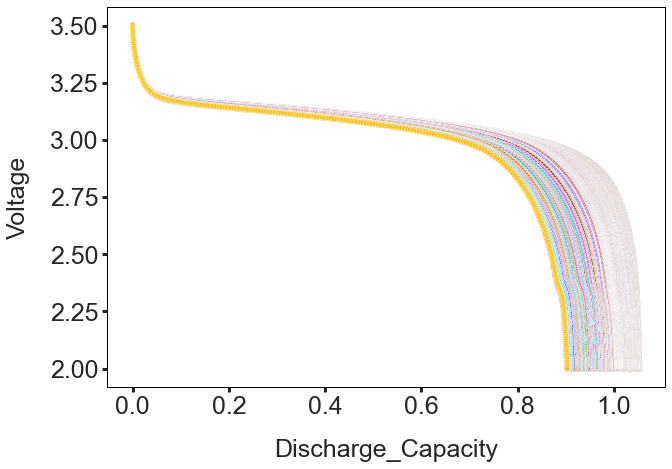

In [37]:
sns.set_style('ticks')
sns.set_context('poster')
with plt.rc_context(dict(sns.axes_style("ticks"),
                         **sns.plotting_context({'font.size': 15.0,
                                                 'axes.labelsize': 25.0,
                                                 'axes.labelpad': 20.0,
                                                 'axes.titlesize': 25.0,
                                                 'xtick.labelsize': 25.0,
                                                 'ytick.labelsize': 25.0,
                                                 'legend.fontsize': 15.0,
                                                 'axes.linewidth': 1.0,
                                                 'grid.linewidth': 0.0001,
                                                 'lines.linewidth': 1,
                                                 'lines.markersize': 5.0,
                                                 'patch.linewidth': 0.0,
                                                 'axes.facecolor': 'white',
                                                 'axes.edgecolor': '0',
                                                 'axes.grid': True,
                                                 'axes.axisbelow': True,
                                                 'axes.labelcolor': '.15',
                                                 'figure.facecolor': 'white',
                                                 'font.family': ['sans-serif'],
                                                 'font.sans-serif': ['Arial'],
                                                 'grid.color': '0.8',
                                                 'grid.linestyle': '--',
                                                 'text.color': '.15',
                                                 'xtick.color': '.15',
                                                 'ytick.color': '.15',
                                                 'xtick.direction': 'out',
                                                 'ytick.direction': 'out',
                                                 'lines.solid_capstyle': 'round',
                                                 'patch.edgecolor': 'w',
                                                 'patch.force_edgecolor': False,
                                                 'xtick.major.width': 3.0,
                                                 'ytick.major.width': 3.0,
                                                 'xtick.minor.width': 3.0,
                                                 'ytick.minor.width': 3.0,
                                                 'xtick.major.size': 5,
                                                 'ytick.major.size': 5.0,
                                                 'xtick.minor.size': 5.0,
                                                 'ytick.minor.size': 5.0 }))):
    
    plt.rcParams['figure.figsize'] = (10,7)        
    fig,axs = plt.subplots(1,1)
    sns.scatterplot(x = 'Discharge_Capacity',y = 'Voltage',data = batt_data_04,hue = 'Cycle_Index',palette = 'bright',legend = False,ax  =axs)

In [38]:
# plotly express library helps to zoom in the datapoints which are closely converged
import plotly
from plotly.express import line,scatter
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [39]:
#Discharge Capacity characteristics
scatter(batt_data_04[batt_data_04['Cycle_Index']%100 == 0],x = 'Discharge_Capacity',y = 'Voltage',color = 'Cycle_Index')

The above plot shows that discharge capacity vs voltage over the entire cyclic duration. The maximum discharge capacity has been reduced with increase in no of full cycles. It can also be seen that the end of discharge voltage in the later stages of cycling reaches quicker compared to new cells. The voltage gradient after 60% DoD is more divergent which resembles the influence of ageing on the batteries.

In [40]:
#dv/dt characteristics
scatter(batt_data_04[batt_data_04['Cycle_Index']%100 == 0],x = 'Discharge_Capacity',y = 'dV/dt',color = 'Cycle_Index')

Similar to votlage curves, dV/dt i.e the voltage gradient has also shown similar behaviour. Larger gradients at the end of discharge voltages and a uniform pattern during the initial phases. We can build better models when we also have the capacity gradient i.e. dQ/dt to estimate the loss of capacity through ICA or DVA analysis. However, some additional methodology with smoothing function needs to be implemented. So in this case, this methodology is not considered. 

In [41]:
len(discharged_cap)

2189

Text(0.5, 0, 'Full Cycle Equivalants')

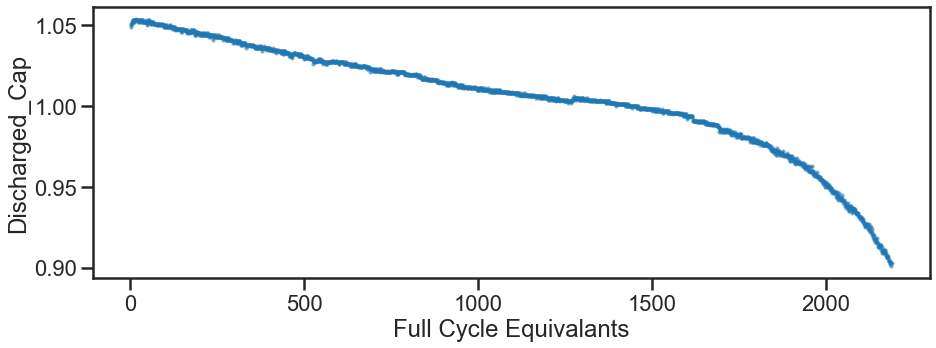

In [42]:
FCE = np.arange(1,2190,1)
plt.scatter(FCE,discharged_cap.values(),s = 5,marker = 'o',alpha = 0.5)
plt.ylabel('Discharged_Cap')
plt.xlabel('Full Cycle Equivalants')

From the above curve showing the max discharged capacity w.r.t Full Cycles, it can be inferred that the capacity degradation is consistent with every cycle and by using only these two datasets i.e FCE as predictor and Capacity as Target variable, we can build a polynomial regression model which gives the trend in the future time steps. However, in this challenge, I prefer to use Deeplearning methods considering the infleunce of other factors.

Text(0.5, 0, 'Full Cycle Equivalants')

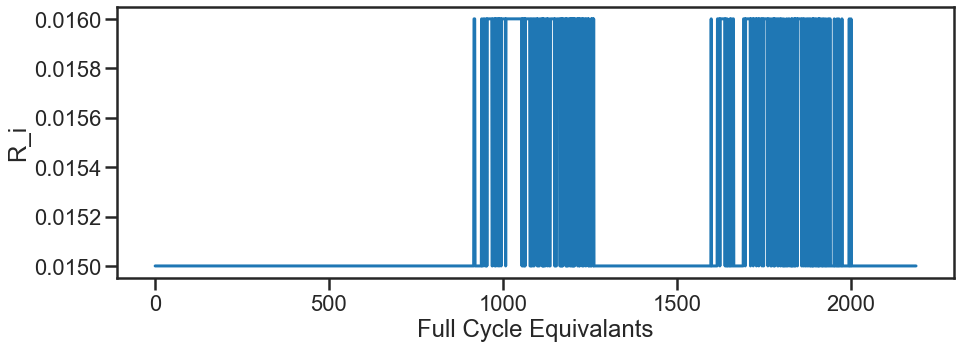

In [43]:
plt.plot(int_resistance.values())
plt.ylabel('R_i')
plt.xlabel('Full Cycle Equivalants')

From the Internal resistance w.r.t Full Cycle Equivalants, Theoretically,over the cyclic duration, there shall be a consistent rise in resistance (assuming similar operating conditions),but in this case, these values dont represent that trend and are inconsistent (might be an issue with the way the internal resistance is calculated). From this, I can conclude that these values doesn't represent the ageing of the battery and hence they are ignored.

In [58]:
# Polynomial Regression Basic Model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x = FCE
y = np.array(list(discharged_cap.values()))

In [64]:
# Training the model
poly_model = np.poly1d(np.polyfit(x,y,5))

R-Square of the polynomial fit: 0.9989578530203499


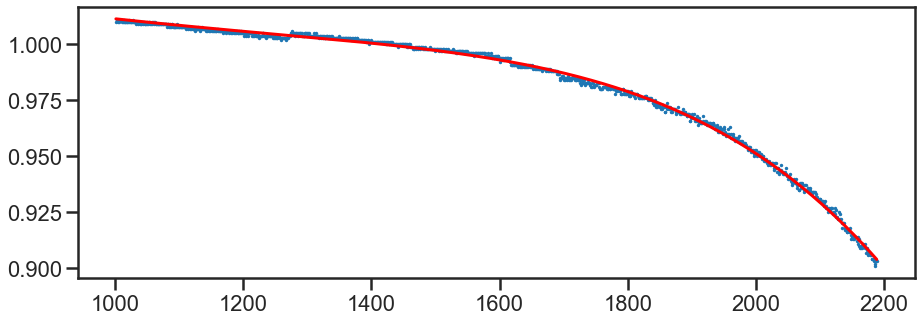

In [66]:
plt.scatter(x[1000:],y[1000:],s = 2)
plt.plot(x[1000:],poly_model(x[1000:]),'r')
print('R-Square of the polynomial fit:',r2_score(y,poly_model(x)))

In [74]:
test_data = np.arange(2190,2300,1)

In [75]:
pred_test = poly_model(test_data)

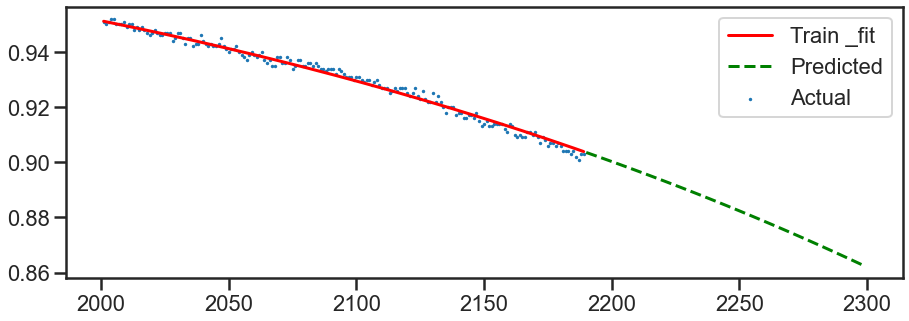

In [80]:
plt.scatter(x[2000:],y[2000:],s = 2)
plt.plot(x[2000:],poly_model(x[2000:]),'r')
plt.plot(test_data,pred_test,'--g')
plt.legend(['Train _fit','Predicted','Actual'])


1D polynomial regression is very easy to model as we only use the historical data of the predictor to match fit the target variable. However this prediction would be accruate only if we have an accurate cycle count at given depth of discharge in the monitoring dataset. 

# 3. Model with Deep Neural Networks (DNN): 
Neural networks are datadriven based and unlike the model based prediction algorithms, these are unperturbed by the cell internal parameters. DNNs have history of accurately match the relationships among the predictors to the target variables. 
In this case, at first i begin with a feed forward NN to estimate the real time discharged capacity i.e. State of Charge (SoC).

Prior to the modelling, the correlation between predictors shall be observed to understand and process the data better.Pandas correlation function together with a heatmap could give better results.


<AxesSubplot:>

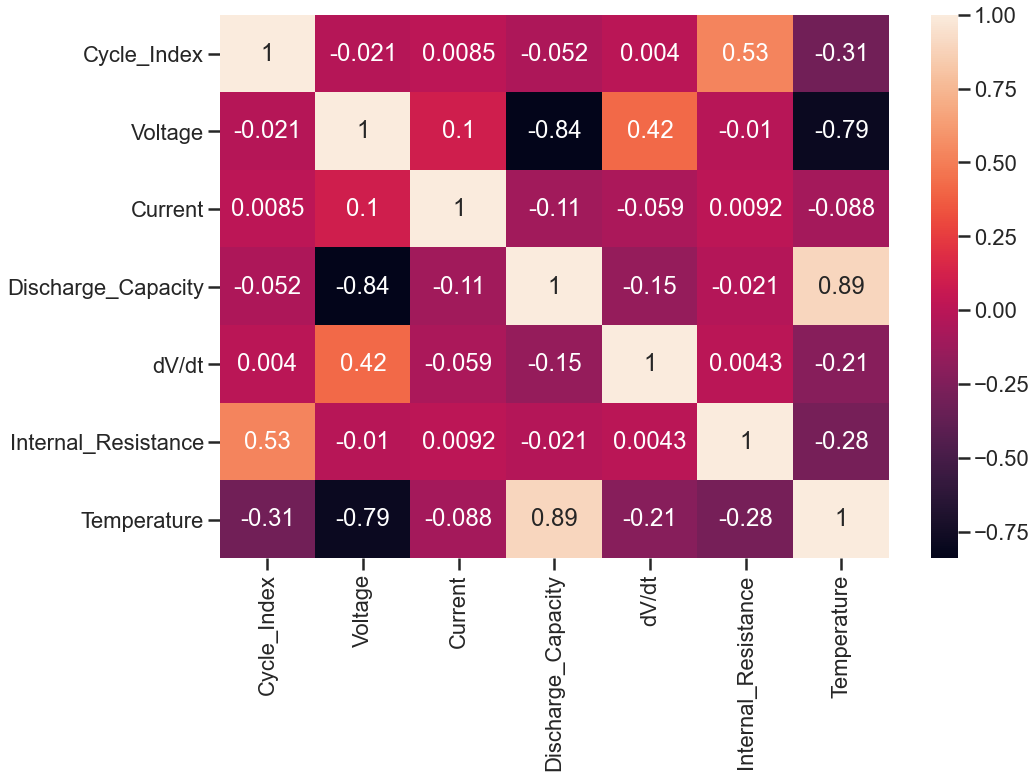

In [85]:
#check correlation of the data 
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(batt_data_04.corr(),annot = True,)

In our model, we consider the target as the discharge capacity and we observe the influence or correlation of every predictor with this variable. Postive values denote positive correlations and viceversa. Voltage & temperature are strongly correlated with discharge capacity and so is current and dV/dt. So we start with these variables as input to predict the Discharge capacity.

In [88]:
batt_data_05 = batt_data_04[['Voltage','Temperature','Current','dV/dt','Discharge_Capacity']]


In [89]:
batt_data_05.describe()

Voltage    Temperature        Current          dV/dt  \
count  568420.000000  568420.000000  568420.000000  568420.000000   
mean        2.888229      34.701693      -4.398928      -0.010461   
std         0.386884       1.787689       0.016582       0.018775   
min         1.993858      29.901241      -4.402965      -0.127359   
25%         2.621170      33.274882      -4.400190      -0.012722   
50%         3.057206      34.688845      -4.400070      -0.001261   
75%         3.146566      36.229725      -4.399944      -0.000296   
max         3.506285      38.206706      -4.003974       0.081761   

       Discharge_Capacity  
count       568420.000000  
mean             0.593646  
std              0.362547  
min              0.000000  
25%              0.258143  
50%              0.655209  
75%              0.953253  
max              1.053603

As every predictor is distributed across various mean values, the data is normalized between 0 to 1 to have a uniform distribution by scaling the data. This step of scaling the data gives a better training performance and mapping. 

In [90]:
# Target Variable
Cap_dis = batt_data_05.pop('Discharge_Capacity')

In [91]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.metrics import mean_squared_error,r2_score

In [92]:
# split the data into train, validation and test modes

x_train,x_test,y_train,y_test = train_test_split(batt_data_05,Cap_dis,shuffle = True,test_size = 0.3)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle = True,test_size = 0.5)


In [93]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)
x_test_scaled = scaler.fit_transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val_scaled = scaler.fit_transform(y_val.values.reshape(-1,1))
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))


The datasets are preprocessed, normalized and converted to a suitable format that a neural network can accept and process. In the next step, the model is built and train dataset is fed into it for learning.  
The validation and test datasets are used to validate the model performance with the data that is different from traindataset. 

Keras platform of Tensorflow is used to build the model.

In [94]:
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,ZeroPadding2D,add,BatchNormalization,Activation,AveragePooling2D,Dropout
from keras.layers import LSTM,Bidirectional
from keras.datasets import mnist
from keras.utils import to_categorical,plot_model
from keras.optimizers import SGD,Adam

from keras.models import load_model,Model
from keras.backend import placeholder
from keras.initializers import glorot_uniform
#from keras.utils import multi_gpu_model
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [95]:
# reviewing the shapes of the train and test datasets to design the architecture of the model.

print('The shape of train dataset is:',x_train.shape)
print('The shape of validation dataset is:',x_val.shape)
print('The shape of test dataset is:',x_test.shape)

The shape of train dataset is: (397894, 4)
The shape of validation dataset is: (85263, 4)
The shape of test dataset is: (85263, 4)


In [98]:
def DNN(X):
    np.random.seed(1)   # to generate a same set of random weights during every run.
    model = Sequential()

    model.add(Dense(4,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros',input_dim=X.shape[1]))

    model.add(Dense(256,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(128,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(64,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model.add(Dense(10,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model.add(Dense(1,activation='relu',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    
    model.summary()

    model.compile(loss='mse', optimizer=Adam(lr=0.00001))  #Adam optimizer gives the best model performance.

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
    
    history = model.fit(x_train_scaled,y_train_scaled,batch_size = 32, epochs = 20,validation_data = (x_val_scaled,y_val_scaled),verbose = 1,shuffle = False,callbacks=[es])
    
    plt.plot(history.history['loss'],label ='train')
    plt.plot(history.history['val_loss'],label = 'val loss')
    
    
    return model

In [99]:
model = DNN(x_train_scaled)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 43,113
Trainable params: 43,113
Non-trainable params: 0
____________________________________________________

The model architecture is designed as shown above. The input layer has 4 nodes which are the four predictors in our train dataset. Then, it is followed by 4 hidden layers and then by the output layer with 1 output node. Different activation functions were used in this model such as tan and relu. As we are dealing with series of values > 0, i preferred relu function and for the remaining all i used tanh. 

hyper parameter tuning:

Bias = 0

Optimizer = Adam (gives best performance than Gradient descent or SGD)

Learningrate : 0.00001 (started with high learning rates and resulted in variance (overfitting) and diverging of loss.So tuned until 0.00001 besides the no of nodes in hidden layers).

early stopping active when the loss is stabilized or diverging.

epochs : 20


Epoch 1/20
12435/12435 [==============================] - 18s 1ms/step - loss: 0.0113 - val_loss: 0.0033
Epoch 2/20
12435/12435 [==============================] - 17s 1ms/step - loss: 0.0011 - val_loss: 4.1602e-04
Epoch 3/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.9510e-04 - val_loss: 3.8754e-04
Epoch 4/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.7736e-04 - val_loss: 3.7728e-04
Epoch 5/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.6858e-04 - val_loss: 3.7088e-04
Epoch 6/20
12435/12435 [==============================] - 21s 2ms/step - loss: 3.6269e-04 - val_loss: 3.6603e-04
Epoch 7/20
12435/12435 [==============================] - 19s 2ms/step - loss: 3.5847e-04 - val_loss: 3.6211e-04
Epoch 8/20
12435/12435 [==============================] - 23s 2ms/step - loss: 3.5504e-04 - val_loss: 3.5895e-04
Epoch 9/20
12435/12435 [==============================] - 18s 1ms/step - loss: 3.5230e-04 - val_loss: 3.5589

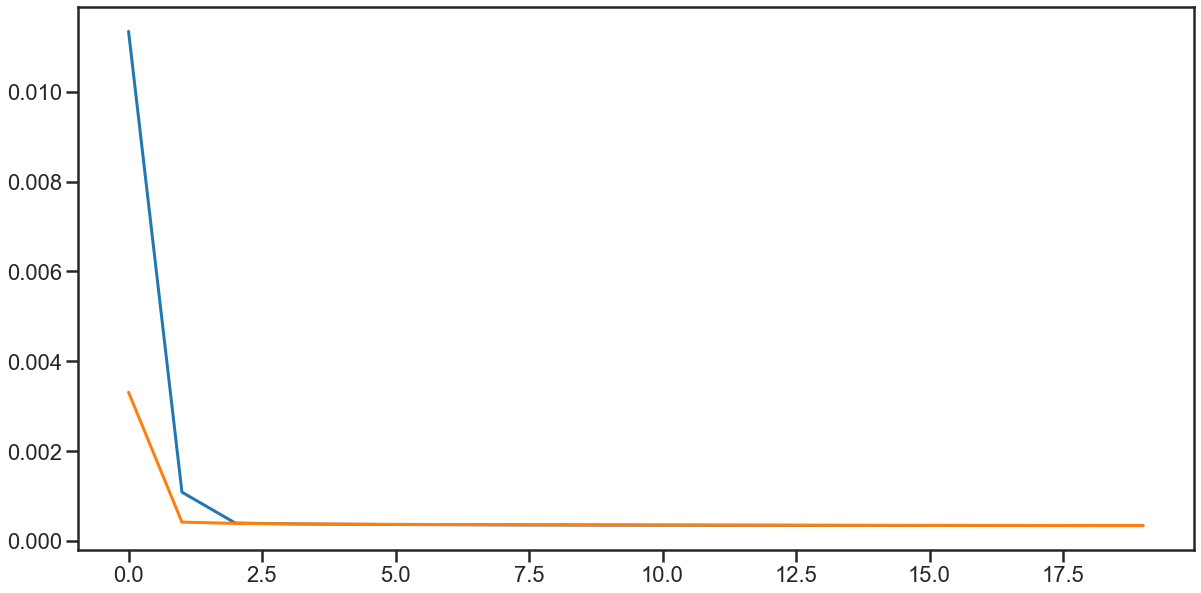

In [64]:
model = DNN(x_train_scaled)
model.save_weights('model.h5')

In [65]:
predictions_train = model.predict(x_train_scaled);
R2 = r2_score(y_train_scaled,predictions_train)
print('R-square value for training:',R2)

predictions_val = model.predict(x_val_scaled);
R2 = r2_score(y_val_scaled,predictions_val)
print('R-square value for validation:', R2)

predictions_test = model.predict(x_test_scaled);
R2 = r2_score(y_test_scaled,predictions_test)
print('R-square value for test:', R2)

pred_train = scaler.inverse_transform(predictions_train)
y_act_train = scaler.inverse_transform(y_train_scaled)

pred_val = scaler.inverse_transform(predictions_val)
y_act_val = scaler.inverse_transform(y_val_scaled)

pred_test = scaler.inverse_transform(predictions_test)
y_act_test = scaler.inverse_transform(y_test_scaled)



R-square value for training: 0.9971345066661795
R-square value for validation: 0.9971269373721203
R-square value for test: 0.9840747087450435


In [66]:
pred_data = pd.concat((pd.DataFrame(pred_train),pd.DataFrame(pred_val),pd.DataFrame(pred_test),pd.DataFrame(y_act_train),pd.DataFrame(y_act_val),pd.DataFrame(y_act_test)),axis = 1)
pred_data.columns = ['pred_train','pred_validation','pred_test','act_train','act_validation','act_test']

In [67]:
scatter(pred_data[:1000],x = 'pred_train',y='act_train')

In [68]:
scatter(pred_data[:300],x = 'pred_validation',y='act_validation')

<AxesSubplot:ylabel='Count'>

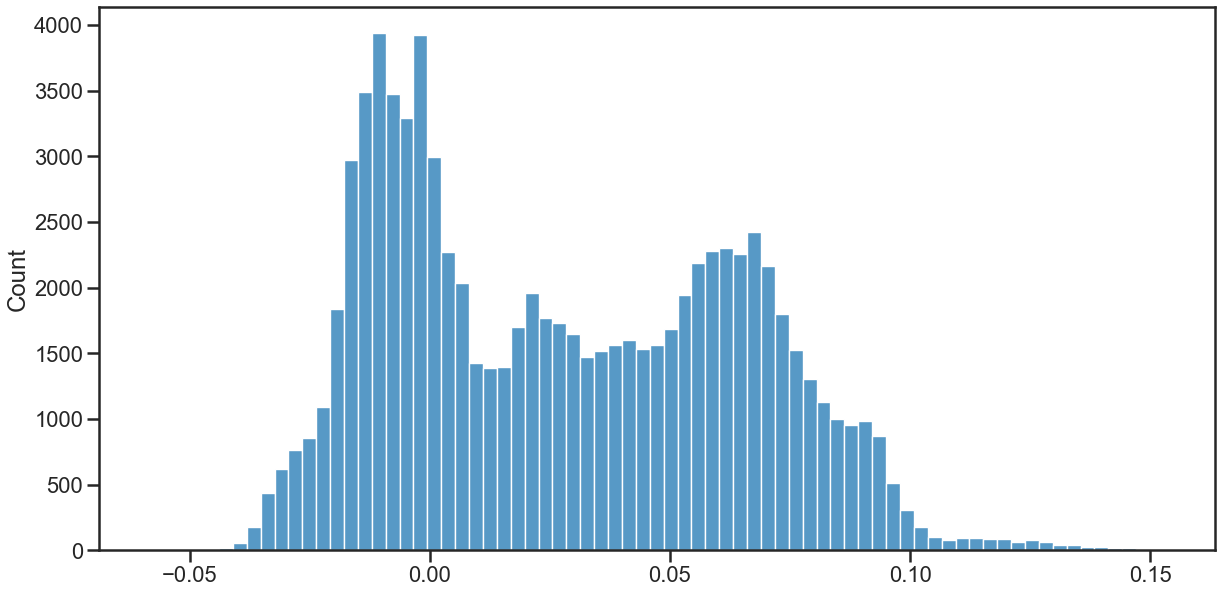

In [69]:
sns.histplot(pred_data['pred_test']-pred_data['act_test'])

Conclusions Drawn: 

From the above distribution plot, it can be seen the max error in prediction is around 0.10 Ah and most of the data points have less than 0.05 AH difference. The R2 values are also almost same like the mse.This indicates that the model is not overfitted or underfitted. 

# 4. Approach to estimate the Max. Allowed Discharge:

In the previous case, we have estimated the possible amount of capacity discharged in that particular cycle given the measurements of voltage, current, temperatures etc. Now, the maximum discharge i.e. SoH shall be estimated by same set of data.
A model is built by using the cyclic count as an additional predictor to determine the maximum allowed discharge capacity during that particular event. In this case, we use an additional target variable instead of max discharge directly i.e. State of Health (SoH).

In [70]:
batt_data_06 = batt_data_04.copy()
batt_data_06.drop(['Internal_Resistance'],axis = 1,inplace = True)
batt_data_06['max_Capacity'] = 'nan'
batt_data_06.reset_index(inplace = True,drop = True)

In [71]:
#voltage - capacity characteristics

scatter(batt_data_06[batt_data_06['Cycle_Index']%50 == 0],x = 'Discharge_Capacity',y = 'Voltage',color = 'Cycle_Index')

In [72]:
# temperature - capacity characteristics

scatter(batt_data_06[batt_data_06['Cycle_Index']%50 == 0],x = 'Discharge_Capacity',y = 'Temperature',color = 'Cycle_Index')

As explained before, battery voltage over the entire duration of cycling has shown significant influence of the capacity. The voltage gradient increases with cycling and due to this the End of discharge voltage is quickly reached. However, the variation in the voltage is more effective in the later part of discharge event i.e. after discharging 0.6 AH of capacity. So in this model we ignore the data below 0.6 Ah and train the model with the remaining data. 

Unlike previous case, the temperature has no meaningful influence on the State of health as the tests were performed at a same ambient temperature. There is no clear indication of either temperature or temperature gradient inlfuencing the ageing. So we ignore this term in this model.

In [73]:
batt_data_06 = batt_data_06[batt_data_06['Discharge_Capacity'] > 0.6]

In [74]:
batt_data_06.head()

Cycle_Index   Voltage   Current  Discharge_Capacity     dV/dt  \
120            1  3.079469 -4.400157            0.602789 -0.000313   
121            1  3.077933 -4.400232            0.608896 -0.000329   
122            1  3.076429 -4.400150            0.615050 -0.000295   
123            1  3.074897 -4.400300            0.621129 -0.000375   
124            1  3.073324 -4.400211            0.627288 -0.000333   

     Temperature max_Capacity  
120    34.635388          nan  
121    34.686478          nan  
122    34.738502          nan  
123    34.738503          nan  
124    34.743603          nan

In [75]:
import warnings
warnings.filterwarnings("ignore")

for i in (batt_data_06['Cycle_Index'].unique()):
    batt_data_06['max_Capacity'][batt_data_06['Cycle_Index'] == i] = discharged_cap[str(i)]

In [76]:
batt_data_06['SoH'] = batt_data_06['max_Capacity']/batt_data_06['max_Capacity'].max()

In [77]:
batt_data_06['SoH'] = batt_data_06['SoH'].astype('float64')
batt_data_06['max_Capacity'] = batt_data_06['max_Capacity'].astype('float64')

In [78]:
batt_data_06.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303955 entries, 120 to 568419
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Cycle_Index         303955 non-null  int64  
 1   Voltage             303955 non-null  float64
 2   Current             303955 non-null  float64
 3   Discharge_Capacity  303955 non-null  float64
 4   dV/dt               303955 non-null  float64
 5   Temperature         303955 non-null  float64
 6   max_Capacity        303955 non-null  float64
 7   SoH                 303955 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 20.9 MB


<AxesSubplot:>

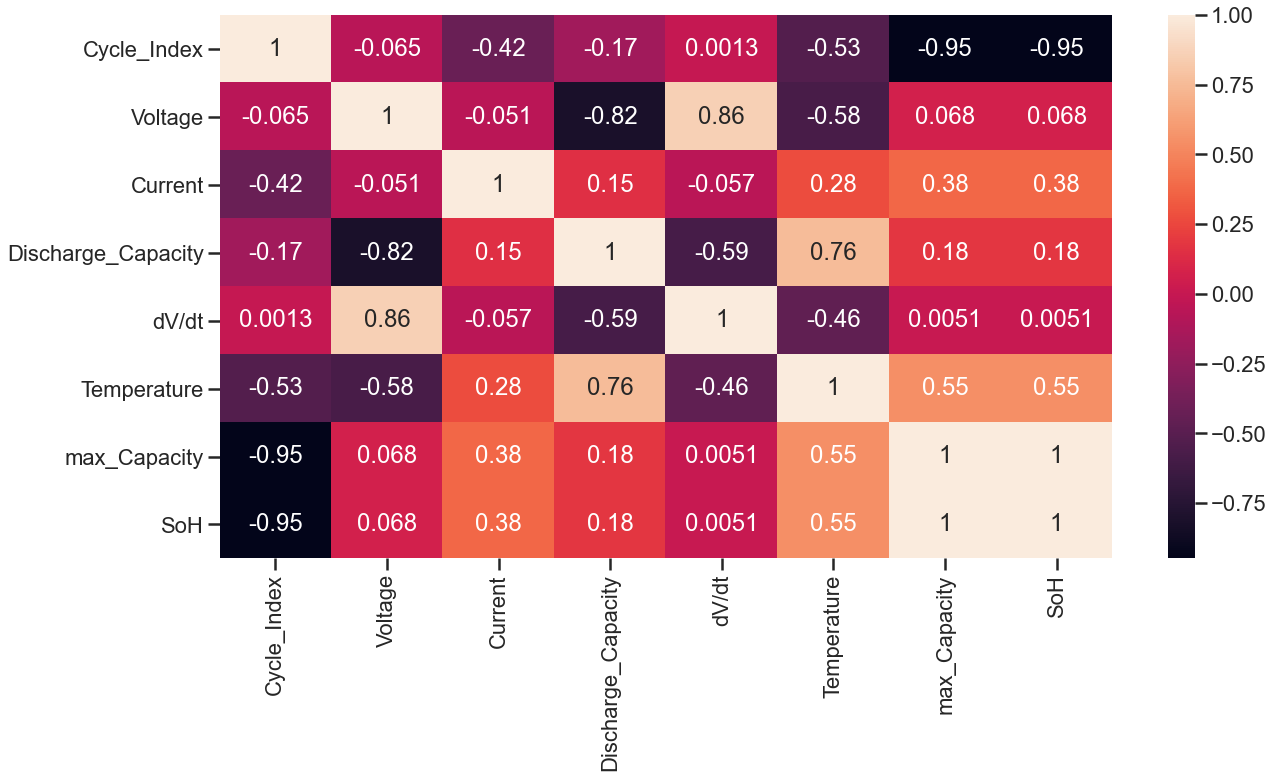

In [79]:
sns.heatmap(batt_data_06.corr(),annot = True)

In [80]:
batt_data_07 = batt_data_06[['Cycle_Index','Voltage','Discharge_Capacity','SoH']]

In [81]:
y_data = batt_data_07.pop('SoH')
x_data = batt_data_07

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,shuffle = True,test_size = 0.3)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle = True,test_size = 0.5)

In [83]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.fit_transform(x_val)
x_test_scaled = scaler.fit_transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
y_val_scaled = scaler.fit_transform(y_val.values.reshape(-1,1))
y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1,1))

In [84]:
x_train_scaled.shape

(212768, 3)

In [85]:
def DNN_2(X):
    np.random.seed(1)   # to generate a same set of random weights during every run.
    model1 = Sequential()

    model1.add(Dense(3,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros',input_dim=X.shape[1]))

    model1.add(Dense(512,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(128,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(64,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))

    model1.add(Dense(10,activation='tanh',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model1.add(Dense(1,activation='relu',kernel_initializer = 'glorot_uniform',bias_initializer = 'zeros'))
    
    model1.compile(loss='mse', optimizer=Adam(lr=0.000001))  #Adam optimizer gives the best model performance.

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)
    
    history = model1.fit(x_train_scaled,y_train_scaled,batch_size = 32, epochs = 20,validation_data = (x_val_scaled,y_val_scaled),verbose = 1,shuffle = False,callbacks=[es])
    
    plt.plot(history.history['loss'],label ='train')
    plt.plot(history.history['val_loss'],label = 'val loss')
    
    
    return model1

Except for the number of input nodes, the remaining part of hyperparameter tuning and modelling is same as explained before.

Epoch 1/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0669 - val_loss: 0.0192
Epoch 2/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0152 - val_loss: 0.0118
Epoch 3/20
6649/6649 [==============================] - 13s 2ms/step - loss: 0.0088 - val_loss: 0.0065
Epoch 4/20
6649/6649 [==============================] - 12s 2ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 5/20
6649/6649 [==============================] - 12s 2ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 6/20
6649/6649 [==============================] - 11s 2ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 7/20
6649/6649 [==============================] - 14s 2ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/20
6649/6649 [==============================] - 15s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/20
6649/6649 [==============================] - 14s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 10/20
6649/6649 [==============================] - 13s 2ms/step - l

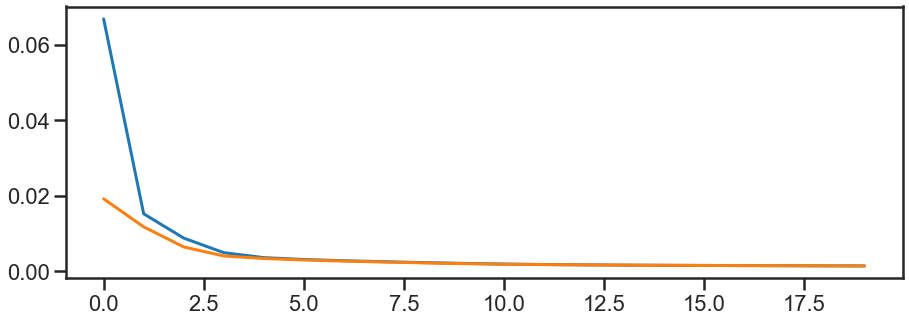

In [91]:
model1 = DNN_2(x_train_scaled)
model1.save_weights('model1.h5')

In [92]:
predictions_train = model1.predict(x_train_scaled);
R2 = r2_score(y_train_scaled,predictions_train)
print('R-square value for training:',R2)

predictions_val = model1.predict(x_val_scaled);
R2 = r2_score(y_val_scaled,predictions_val)
print('R-square value for validation:', R2)

predictions_test = model1.predict(x_test_scaled);
R2 = r2_score(y_test_scaled,predictions_test)
print('R-square value for test:', R2)

pred_train = scaler.inverse_transform(predictions_train)
y_act_train = scaler.inverse_transform(y_train_scaled)

pred_val = scaler.inverse_transform(predictions_val)
y_act_val = scaler.inverse_transform(y_val_scaled)

pred_test = scaler.inverse_transform(predictions_test)
y_act_test = scaler.inverse_transform(y_test_scaled)


R-square value for training: 0.9682572325879031
R-square value for validation: 0.9681151317203258
R-square value for test: 0.9684115375947514


In [93]:
pred_data = pd.concat((pd.DataFrame(pred_train),pd.DataFrame(pred_val),pd.DataFrame(pred_test),pd.DataFrame(y_act_train),pd.DataFrame(y_act_val),pd.DataFrame(y_act_test)),axis = 1)
pred_data.columns = ['pred_train','pred_validation','pred_test','act_train','act_validation','act_test']

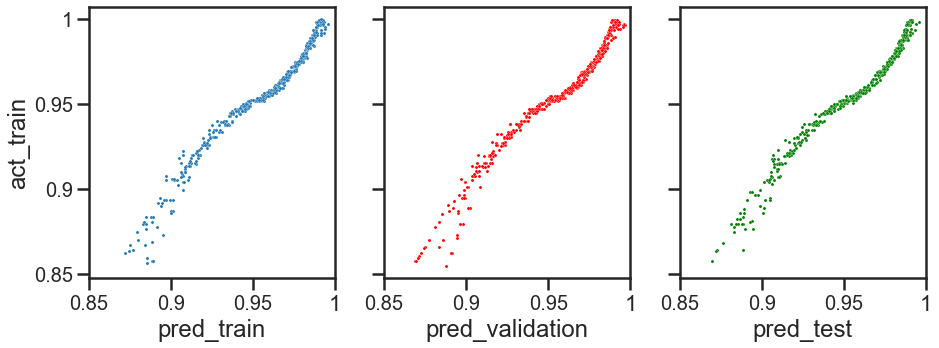

In [94]:
plt.rcParams['figure.figsize'] = (15,5)
fig,axs = plt.subplots(ncols = 3,nrows  =1, sharey = True)
axs = axs.flatten()
sns.scatterplot(x = 'pred_train',y = 'act_train',data = pred_data[0:500],ax = axs[0],s = 10)
sns.scatterplot(x = 'pred_validation',y = 'act_validation',data = pred_data[0:500],ax = axs[1],s=10,color = 'r')
sns.scatterplot(x = 'pred_test',y = 'act_test',data = pred_data[0:500],ax = axs[2],s =10,color = 'g')
axs[0].set_xlim(0.85,1)
axs[0].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[0].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[0].set_yticks([0.85,0.9,0.95,1])
axs[0].set_xticks([0.85,0.9,0.95,1])

axs[1].set_xlim(0.85,1)
axs[1].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[1].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[1].set_yticks([0.85,0.9,0.95,1])
axs[1].set_xticks([0.85,0.9,0.95,1])

axs[2].set_xlim(0.85,1)
axs[2].set_xticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[2].set_yticklabels([0.85,0.9,0.95,1],fontsize = 20)
axs[2].set_yticks([0.85,0.9,0.95,1])
axs[2].set_xticks([0.85,0.9,0.95,1])


Text(0.5, 0, 'Test')

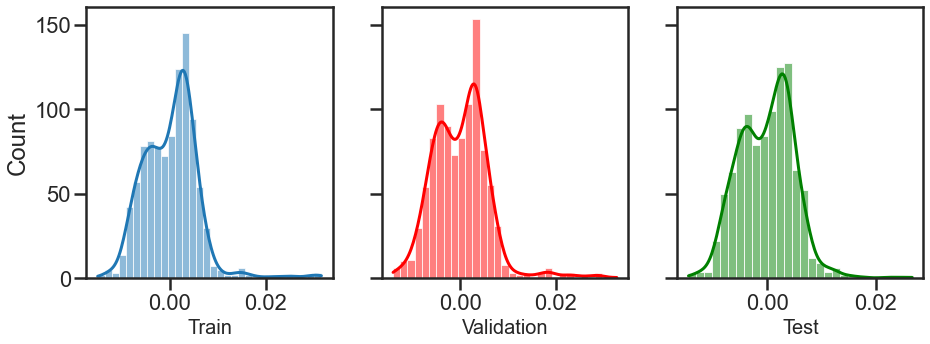

In [97]:
plt.rcParams['figure.figsize'] = (15,5)
fig,axs = plt.subplots(ncols = 3,nrows  =1, sharey = True)
axs = axs.flatten()
sns.histplot(pred_data['pred_train'][0:1000]-pred_data['act_train'][0:1000],ax = axs[0],kde = True)
sns.histplot(pred_data['pred_validation'][0:1000]-pred_data['act_validation'][0:1000],ax = axs[1],color = 'r',kde = True)
sns.histplot(pred_data['pred_test'][0:1000]-pred_data['act_test'][0:1000],ax = axs[2],color = 'g',kde = True)
axs[0].set_xlabel('Train',fontsize = 20)
axs[1].set_xlabel('Validation',fontsize = 20)
axs[2].set_xlabel('Test',fontsize = 20)


the above model shows no bias or variance in the dataset as the R-2 value and mse remains under accepted values for all datasets. The above distplots explains the variance of the prediction errors which are les than 2%.

# LSTM based Approach:

CNN and LSTM is the widely used technique now in the state of charge and state of health estimations. State of charge follows a pattern which is similst to time series forecasting and it gives excellent model performance with LSTM networks. On the otherside, SoH is a tricky phenomenon. In EV the discharge curves wont be the same everytime and its pretty hard to define the boundary conditions. But charging profiles remain the same over the lifetime. These charging profiles are converted into the datasets suitable to CNNs such as image datasets and the model is trained. Here, one entire charge profile is considered as one input.

In this approach, I modelled with LSTM network, whereas with CNN we need some additional time to data augmentation and training needs a cloud platform or a gpu. So i confined myself to LSTM.


In [106]:
batt_data_08 = batt_data_06[['Cycle_Index','Voltage','Discharge_Capacity','Temperature','SoH']]

In [107]:
#LSTM features 
n_i = 1 #previous time steps to predict the next step
n_f = len(batt_data_08.columns)-1  # no of predictors
n_o = 1 # prediction timesteps

In [108]:
# inorder to build a lstm model, the data shall be made some changes as per the LSTM format.
def data_to_LSTM_format(df,n_i,n_f,n_o):
    n_vars = df.shape[1]

    cols, names = list(),list()

    for i in range(n_i,0,-1):

        cols.append(df.shift(i))

        names += [('var%d(t-%d)') %((j+1,i)) for j in range(n_vars)]

    
    for i in range(n_o):
        cols.append(df.shift(i))

    for j in range(n_vars):

        for i in range(0,n_o):

            if i== 0:
                names+=[('var%d(t)') %(j+1)]

            else:
                names +=[('var%d(t+%d)')%((j+1,i))]

    df_LSTM = pd.concat(cols,axis=1)
    df_LSTM.columns = names

    df_LSTM.dropna(inplace = True)
    
    return names,df_LSTM



In [111]:
names,data_LSTM = data_to_LSTM_format(batt_data_08,n_i,n_f,n_o)

In [112]:
data_LSTM.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var1(t)   var2(t)  \
121        1.0   3.079469   0.602789  34.635388   0.995256        1  3.077933   
122        1.0   3.077933   0.608896  34.686478   0.995256        1  3.076429   
123        1.0   3.076429   0.615050  34.738502   0.995256        1  3.074897   
124        1.0   3.074897   0.621129  34.738503   0.995256        1  3.073324   
125        1.0   3.073324   0.627288  34.743603   0.995256        1  3.071741   

      var3(t)    var4(t)   var5(t)  
121  0.608896  34.686478  0.995256  
122  0.615050  34.738502  0.995256  
123  0.621129  34.738503  0.995256  
124  0.627288  34.743603  0.995256  
125  0.633391  34.747166  0.995256

In [114]:
#convert it into 3d format. 
data_x = data_LSTM[data_LSTM.columns[:n_i*n_f+n_o-1]]
data_y = data_LSTM[data_LSTM.columns[-n_o:]]

In [115]:
#split the datasets 

x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,shuffle= False,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,shuffle=False,test_size = 0.5)


In [116]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_val_scaled = scaler.fit_transform(x_val)

y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test_scaled = scaler.fit_transform(np.array(y_test).reshape(-1,1))
y_val_scaled = scaler.fit_transform(np.array(y_val).reshape(-1,1))

In [118]:
x_train_LSTM = x_train_scaled.reshape(x_train.shape[0],n_i,n_f)
x_test_LSTM = x_test_scaled.reshape(x_test.shape[0],n_i,n_f)
x_val_LSTM = x_val_scaled.reshape(x_val.shape[0],n_i,n_f)

y_train_LSTM = y_train_scaled
y_test_LSTM = y_test_scaled
y_val_LSTM = y_val_scaled

In [119]:
print('The shape of an input for LSTM is:',x_train_LSTM.shape)

The shape of an input for LSTM is: (212767, 1, 4)


In [122]:
def LSTM_model(X):
    
    np.random.seed(1)

    X_i = Input(shape = (X.shape[1],X.shape[2]))
    
    X = Bidirectional(LSTM(256,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences=True,input_shape=(X.shape[1:])))(X_i)
    

    X = Bidirectional(LSTM(128,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences =True))(X)

    X = (LSTM(128,activation = 'tanh',kernel_initializer = 'glorot_uniform',return_sequences =True))(X)

    
    X = Dropout(0.2)(X)
    
    X = Dense(50,activation='tanh',name='layer3')(X)
    
    X = Dense(10,activation='tanh',name='layer4')(X)
    
    X = Dense(1,activation= 'relu',name='layer5')(X)

    model_LSTM = Model(inputs = X_i,outputs = X)
    
    return model_LSTM

In the LSTM model, besides bidirectional lstms, a dropout layer is also used to avoid exploding or vanishing gradients. In every iteration, it skips some nodes to keep gradients under acceptable levels. This is followed by dense layers to estimate the output.

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 512)            534528    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1, 256)            656384    
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
layer3 (Dense)               (None, 1, 50)             6450      
_________________________________________________________________
layer4 (Dense)               (None, 1, 10)            

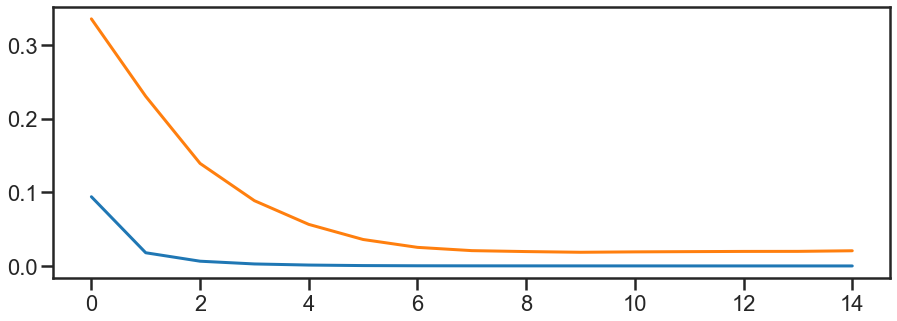

In [124]:
model_LSTM = LSTM_model(x_train_LSTM)
model_LSTM.summary()
np.random.seed(1)
model_LSTM.compile(optimizer = Adam(lr=0.00001),loss = 'mse')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
history = model_LSTM.fit(x_train_LSTM,y_train_LSTM,batch_size = 64, epochs = 20,validation_data = (x_val_LSTM,y_val_LSTM),verbose = 1,shuffle = False,callbacks=[es])
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label = 'val loss')

model_LSTM.save_weights('LSTM.h5')

In [126]:
predictions_train = model_LSTM.predict(x_train_LSTM)
R2 = r2_score(y_train_LSTM,predictions_train.reshape(-1,1))
print('The R-square value for train dataset:',R2)


predictions_val = model_LSTM.predict(x_val_LSTM);
R2 = r2_score(y_val_LSTM,predictions_val.reshape(-1,1))
print('The R-square value for validation dataset:',R2)

predictions_test = model_LSTM.predict(x_test_LSTM);
R2 = r2_score(y_test_LSTM,predictions_test.reshape(-1,1))
print('The R-square value for test dataset:',R2)

The R-square value for train dataset: 0.9882041922746457
The R-square value for validation dataset: 0.77430976066407
The R-square value for test dataset: 0.47075055418136214


In [127]:
pred_train = scaler.inverse_transform(predictions_train.reshape(-1,1))
y_act_train = scaler.inverse_transform(y_train_LSTM)

pred_val = scaler.inverse_transform(predictions_val.reshape(-1,1))
y_act_val = scaler.inverse_transform(y_val_LSTM)

pred_test = scaler.inverse_transform(predictions_test.reshape(-1,1))
y_act_test = scaler.inverse_transform(y_test_LSTM)

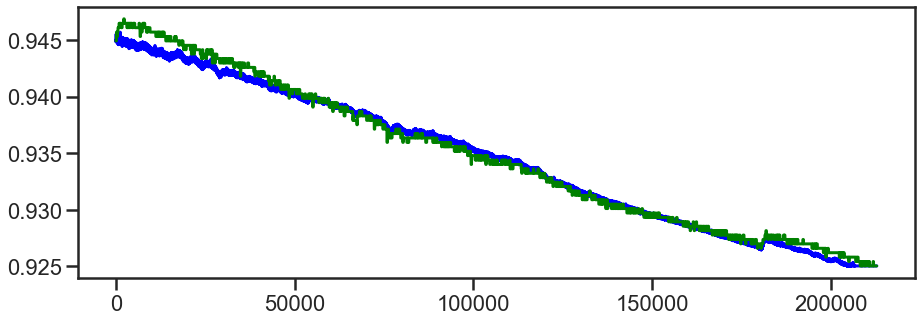

In [128]:
plt.plot(pred_train,'-b')
plt.plot(y_act_train,'-g')

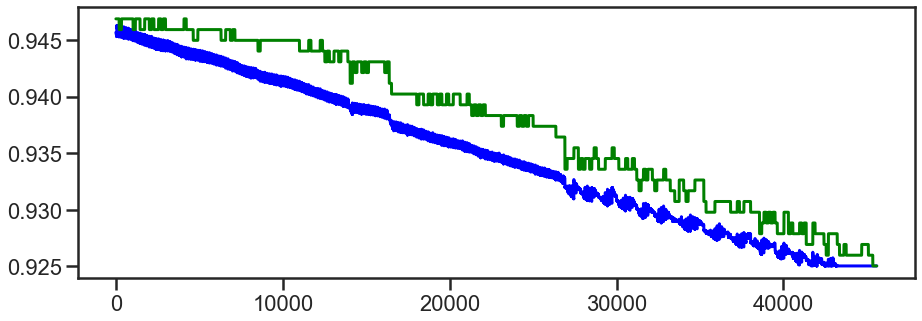

In [129]:
plt.plot(pred_val,'-b')
plt.plot(y_act_val,'-g')

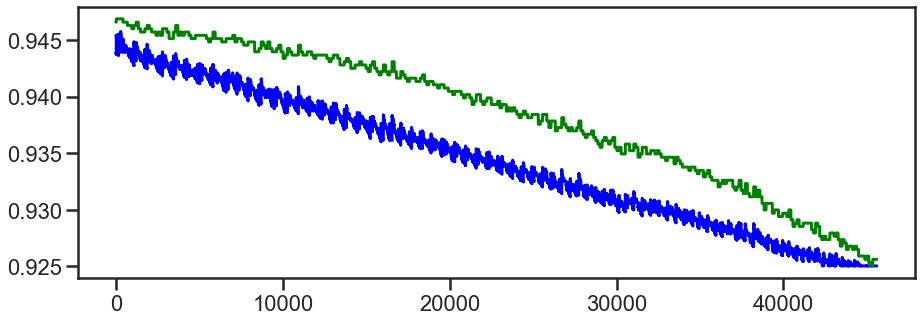

In [130]:
plt.plot(pred_test,'-b')
plt.plot(y_act_test,'-g')

This model has high variance as we can see the dataset is clearly overfitting (train loss << val loss) . To avoid this, we need to increase the dataset size or further tune the learning rates or architecture. The training process consumes lot of time and as you said , the results are secondary, i left it open. 

These models can be improved further with generating new set of data such as dQ/dt, charge profiles for CNN etc. As far as this challenge is concerned, i just want to know that I can write machine learning,DNN programs understand their performance and most importantly the technicalities and boundary conditions of the battery systems to design the models.

